# Draw Neural Network Diagrams in IPython Notebooks (using LaTex)

### Purpose

`tikz` is a LaTex package that allows us to easily draw graphics and diagrams in LaTex. We will use it to draw network diagrams in ipython notebooks.

### Installation

Use `pip` to install this package: 

https://github.com/mkrphys/ipython-tikzmagic

Also, make sure you have `imagemagick` and `pdf2svg` installed in addition to a working version of LaTex (I have `jupyter-latex-envs`....guess that's enough?)

Eg. 
```bash
brew install imagemagick
brew install pdf2svg
```

### Basic Usage

In [4]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


Once the extension is loaded we can use it on a single line to draw a rectangle like this

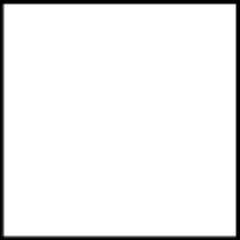

In [5]:
%tikz \draw (0,0) rectangle (1,1);

We can also use two `%%` and then write the LaTex code on multilines like this

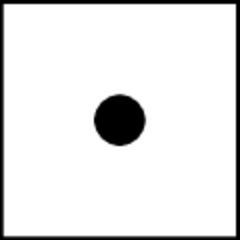

In [6]:
%%tikz
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

### Drawing Network Diagrams

Now we can take a look at drawing networks. 

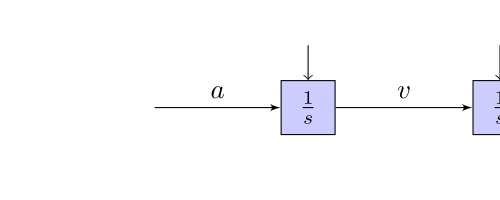

In [32]:
%%tikz -l arrows -f svg -s 500,200

\tikzstyle{int}=[draw, fill=blue!20, minimum size=2em]
\tikzstyle{init} = [pin edge={to-,thin,black}]

\begin{tikzpicture}[node distance=2.5cm,auto,>=latex']
    \node [int, pin={[init]above:$v_0$}] (a) {$\frac{1}{s}$};
    \node (b) [left of=a,node distance=2cm, coordinate] {a};
    \node [int, pin={[init]above:$p_0$}] (c) [right of=a] {$\frac{1}{s}$};
    \node [coordinate] (end) [right of=c, node distance=2cm]{};
    \path[->] (b) edge node {$a$} (a);
    \path[->] (a) edge node {$v$} (c);
    \draw[->] (c) edge node {$p$} (end) ;
\end{tikzpicture}

We can also do...

In [35]:
%%tikz
\begin{tikzpicture}
    \tikzstyle{every node}=[draw,shape=circle];
    
    \foreach \n in {1,...,5} {
        \path (\n*360/\T:1cm) node (\n) {\n};
    }
    \draw (1) -- (2) -- (3) -- (4) -- (5) -- (1);
\end{tikzpicture}

LaTeX terminated with signal -1


This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=pdflatex 2019.10.18)  18 OCT 2019 15:51
entering extended mode
 \write18 enabled.
 %&-line parsing enabled.
**tikz.tex
(./tikz.tex
LaTeX2e <2019-10-01> patch level 1
(/usr/local/texlive/2019/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/local/texlive/2019/texmf-dist/tex/latex/tools/shellesc.sty
Package: shellesc 2016/06/07 v0.02b unified shell escape interface for LaTeX
Package shellesc Info: Unrestricted shell escape enabled on input line 70.
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifluatex.sty
Package: ifluatex 2016/05/16 v1.4 Provides the ifluatex switch (HO)
Package ifluatex Info: LuaTeX not detected.
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty
Package: ifpdf 2018/09/07 v3.3 Provides the ifpdf switch
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.s

In [27]:
preamble = '''
    \def\layersep{2.5cm}
'''

In [33]:
%%tikz -l arrows -f svg -s 500,200

\begin{tikzpicture}[shorten >=1pt,->,draw=black!50, node distance=\layersep]
    \tikzstyle{every pin edge}=[<-,shorten <=1pt]
    \tikzstyle{neuron}=[circle,fill=black!25,minimum size=17pt,inner sep=0pt]
    \tikzstyle{input neuron}=[neuron, fill=green!50];
    \tikzstyle{output neuron}=[neuron, fill=red!50];
    \tikzstyle{hidden neuron}=[neuron, fill=blue!50];
    \tikzstyle{annot} = [text width=4em, text centered]

    \foreach \name / \y in {1,...,4}
        \node[input neuron, pin=left:Input \#\y] (I-\name) at (0,-\y) {};

    \foreach \name / \y in {1,...,5}
        \path[yshift=0.5cm]
            node[hidden neuron] (H-\name) at (\layersep,-\y cm) {};

    \node[output neuron,pin={[pin edge={->}]right:Output}, right of=H-3] (O) {};

    \foreach \source in {1,...,4}
        \foreach \dest in {1,...,5}
            \path (I-\source) edge (H-\dest);

    \foreach \source in {1,...,5}
        \path (H-\source) edge (O);

    \node[annot,above of=H-1, node distance=1cm] (hl) {Hidden layer};
    \node[annot,left of=hl] {Input layer};
    \node[annot,right of=hl] {Output layer};
\end{tikzpicture}

LaTeX terminated with signal -1


This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=pdflatex 2019.10.18)  18 OCT 2019 15:33
entering extended mode
 \write18 enabled.
 %&-line parsing enabled.
**tikz.tex
(./tikz.tex
LaTeX2e <2019-10-01> patch level 1
(/usr/local/texlive/2019/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/local/texlive/2019/texmf-dist/tex/latex/tools/shellesc.sty
Package: shellesc 2016/06/07 v0.02b unified shell escape interface for LaTeX
Package shellesc Info: Unrestricted shell escape enabled on input line 70.
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifluatex.sty
Package: ifluatex 2016/05/16 v1.4 Provides the ifluatex switch (HO)
Package ifluatex Info: LuaTeX not detected.
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/oberdiek/ifpdf.sty
Package: ifpdf 2018/09/07 v3.3 Provides the ifpdf switch
)
(/usr/local/texlive/2019/texmf-dist/tex/generic/ifxetex/ifxetex.s

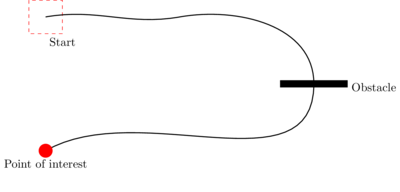

In [7]:
%%tikz
\draw [red,dashed] (-2.5,2.5) rectangle (-1.5,1.5) node [black,below] {Start}; % Draws a rectangle
\draw [thick] (-2,2) % Draws a line
to [out=10,in=190] (2,2)
to [out=10,in=90] (6,0) 
to [out=-90,in=30] (-2,-2);    
\draw [fill] (5,0.1) rectangle (7,-0.1) node [black,right] {Obstacle}; % Draws another rectangle
\draw [red,fill] (-2,-2) circle [radius=0.2] node [black,below=4] {Point of interest}; % Draws a circle